In [1]:
import numpy as np
import pandas as pd

from Replayers import ABTestReplayer, EpsilonGreedyReplayer, ThompsonSamplingReplayer

# Load historical data

In [2]:
rating_df = pd.read_csv('data/top-n-movies_user-ratings.csv').drop(columns='Unnamed: 0')
rating_df.head()

,user_id,movie_id,rating,movie_title
0,307,0,4,Toy Story
1,250,99,4,Fargo
2,24,180,5,Return of the Jedi
3,19,287,1,Scream
4,31,293,3,Liar Liar


## Translate ratings into a binary reward value

In [3]:
reward_threshold = 4
rating_df['reward'] = rating_df.eval('rating > @reward_threshold').astype(int)
rating_df.head()

,user_id,movie_id,rating,movie_title,reward
0,307,0,4,Toy Story,0
1,250,99,4,Fargo,0
2,24,180,5,Return of the Jedi,1
3,19,287,1,Scream,0
4,31,293,3,Liar Liar,0


# Set the parameters for the simulations

In [4]:
n_visits = 20000
n_iterations = 20

reward_history = rating_df
item_col_name = 'movie_id'
visitor_col_name = 'user_id'
reward_col_name = 'reward'

# A/B Test Simulations

## Test period = 1,000 visits

### Run the test

In [5]:
n_test_visits = 1000
ab_1k_results = ABTestReplayer(n_visits, n_test_visits, reward_history,
                               item_col_name, visitor_col_name, reward_col_name,
                               n_iterations=n_iterations).replay()

100%|██████████| 20/20 [04:09<00:00, 12.48s/it]


In [6]:
ab_1k_results_df = pd.DataFrame(ab_1k_results)
ab_1k_results_df.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,120,12,1,1,1.000000
1,0,1,299,783,0,1,0.500000
2,0,2,49,649,1,2,0.666667
3,0,3,49,837,1,3,0.750000
4,0,4,49,483,1,4,0.800000


### Save the output

In [7]:
ab_1k_results_df.to_csv('output/ab_test_1k.csv')

## Test period = 5,000 visits

### Run the test

In [8]:
n_test_visits = 5000
ab_5k_results = ABTestReplayer(n_visits, n_test_visits, reward_history,
                               item_col_name, visitor_col_name, reward_col_name,
                               n_iterations=n_iterations).replay()

100%|██████████| 20/20 [04:11<00:00, 12.57s/it]


In [9]:
ab_5k_results_df = pd.DataFrame(ab_5k_results)
ab_5k_results_df.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,120,12,1,1,1.000000
1,0,1,299,783,0,1,0.500000
2,0,2,49,649,1,2,0.666667
3,0,3,49,837,1,3,0.750000
4,0,4,49,483,1,4,0.800000


### Save the output

In [10]:
ab_5k_results_df.to_csv('output/ab_test_5k.csv')

# $\epsilon$-Greedy Simulations

## $\epsilon$ = 0.05

### Run the test

In [11]:
epsilon = 0.05
epsilon_05_results = EpsilonGreedyReplayer(epsilon, n_visits, reward_history,
                                           item_col_name, visitor_col_name, reward_col_name,
                                           n_iterations=n_iterations).replay()

100%|██████████| 20/20 [04:11<00:00, 12.58s/it]


In [12]:
epsilon_05_results_df = pd.DataFrame(epsilon_05_results)
epsilon_05_results_df.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,0,12,0,0,0.0
1,0,1,257,58,0,0,0.0
2,0,2,0,222,0,0,0.0
3,0,3,0,830,0,0,0.0
4,0,4,0,313,1,1,0.2


### Save the output

In [13]:
epsilon_05_results_df.to_csv('output/epsilon_greedy_05.csv')

## $\epsilon$ = 0.10

### Run the test

In [14]:
epsilon = 0.10
epsilon_10_results = EpsilonGreedyReplayer(epsilon, n_visits, reward_history,
                                           item_col_name, visitor_col_name, reward_col_name,
                                           n_iterations=n_iterations).replay()

100%|██████████| 20/20 [04:13<00:00, 12.66s/it]


In [15]:
epsilon_10_results_df = pd.DataFrame(epsilon_10_results)
epsilon_10_results_df.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,0,12,0,0,0.0
1,0,1,257,58,0,0,0.0
2,0,2,0,222,0,0,0.0
3,0,3,0,830,0,0,0.0
4,0,4,0,313,1,1,0.2


### Save the output

In [16]:
epsilon_10_results_df.to_csv('output/epsilon_greedy_10.csv')

# Thompson Sampling Simulations

### Run the test

In [17]:
thompson_results = ThompsonSamplingReplayer(n_visits, reward_history,
                                            item_col_name, visitor_col_name, reward_col_name,
                                            n_iterations=n_iterations).replay()

100%|██████████| 20/20 [04:11<00:00, 12.59s/it]


In [18]:
thompson_results_df = pd.DataFrame(thompson_results)
thompson_results_df.head()

,iteration,visit,item_id,visitor_id,reward,total_reward,fraction_relevant
0,0,0,299,12,0,0,0.000000
1,0,1,49,333,1,1,0.500000
2,0,2,49,693,1,2,0.666667
3,0,3,49,479,0,2,0.500000
4,0,4,120,525,0,2,0.400000


### Save the output

In [19]:
thompson_results_df.to_csv('output/thompson_sampling.csv')

# Softmax

In [20]:
class SoftmaxReplayer:
    def __init__(self, tau, n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name):
        self.tau = tau  # Temperature parameter
        self.n_visits = n_visits
        self.reward_history = reward_history
        self.item_col_name = item_col_name
        self.visitor_col_name = visitor_col_name
        self.reward_col_name = reward_col_name

    def replay(self):
        items = self.reward_history[self.item_col_name].unique()
        item_count = len(items)

        rewards = np.zeros(item_count)
        counts = np.zeros(item_count)
        results = []

        for visit in range(self.n_visits):
            # Compute probabilities using softmax
            probabilities = np.exp(rewards / self.tau) / np.sum(np.exp(rewards / self.tau))

            # Choose an item based on probabilities
            chosen_item = np.random.choice(items, p=probabilities)

            # Simulate reward
            reward = self.reward_history.query(f"{self.item_col_name} == @chosen_item")[self.reward_col_name].sample().iloc[0]

            # Update counts and rewards
            item_index = np.where(items == chosen_item)[0][0]
            counts[item_index] += 1
            rewards[item_index] += (reward - rewards[item_index]) / counts[item_index]

            # Track cumulative results
            cumulative_rewards = np.sum(rewards * counts) / np.sum(counts)
            results.append({'visit': visit, 'fraction_relevant': cumulative_rewards})

        return results


In [21]:
def simulate_softmax(n_visits, n_iterations, reward_history, item_col_name, visitor_col_name, reward_col_name, tau):
    results = []
    for _ in range(n_iterations):
        replayer = SoftmaxReplayer(tau, n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name)
        results.extend(replayer.replay())
    return pd.DataFrame(results)

In [22]:
# Simulate Softmax Algorithm
softmax_tau = 0.1  # Temperature parameter
softmax_results = simulate_softmax(n_visits, n_iterations, reward_history,
                                   item_col_name, visitor_col_name, reward_col_name, softmax_tau)

# Save results
softmax_results_df = pd.DataFrame(softmax_results)
softmax_results_df.to_csv(f'output/softmax.csv', index=False)

# Average results


In [28]:
class UCBReplayer:
    def __init__(self, c, n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name):
        self.c = c  # Exploration parameter
        self.n_visits = n_visits
        self.reward_history = reward_history
        self.item_col_name = item_col_name
        self.visitor_col_name = visitor_col_name
        self.reward_col_name = reward_col_name

    def replay(self):
        items = self.reward_history[self.item_col_name].unique()
        item_count = len(items)

        rewards = np.zeros(item_count)
        counts = np.zeros(item_count)
        results = []

        for visit in range(1, self.n_visits + 1):
            # Compute UCB for each item
            ucb_values = np.zeros(item_count)
            for i in range(item_count):
                if counts[i] > 0:
                    ucb_values[i] = rewards[i] + self.c * np.sqrt(np.log(visit) / counts[i])
                else:
                    ucb_values[i] = float('inf')  # Ensure exploration of unvisited items

            # Select the item with the highest UCB
            chosen_item_index = np.argmax(ucb_values)
            chosen_item = items[chosen_item_index]

            # Simulate reward
            reward = self.reward_history.query(f"{self.item_col_name} == @chosen_item")[self.reward_col_name].sample().iloc[0]

            # Update counts and rewards
            counts[chosen_item_index] += 1
            rewards[chosen_item_index] += (reward - rewards[chosen_item_index]) / counts[chosen_item_index]

            # Track cumulative results
            cumulative_rewards = np.sum(rewards * counts) / np.sum(counts)
            results.append({'visit': visit, 'fraction_relevant': cumulative_rewards})

        return results


In [29]:
def simulate_ucb(n_visits, n_iterations, reward_history, item_col_name, visitor_col_name, reward_col_name, c):
    results = []
    for _ in range(n_iterations):
        replayer = UCBReplayer(c, n_visits, reward_history, item_col_name, visitor_col_name, reward_col_name)
        results.extend(replayer.replay())
    return pd.DataFrame(results)


In [30]:
# Simulate UCB Algorithm
ucb_c = 1.0  # Exploration parameter
ucb_results = simulate_ucb(n_visits, n_iterations, reward_history,
                           item_col_name, visitor_col_name, reward_col_name, ucb_c)

# Save results
ucb_results_df = pd.DataFrame(ucb_results)
ucb_results_df.to_csv(f'output/ucb.csv', index=False)


# Compare the results

## Average the results across all runs

In [31]:
ab_1k_avg_results_df = ab_1k_results_df.groupby('visit', as_index=False).mean()

ab_5k_avg_results_df = ab_5k_results_df.groupby('visit', as_index=False).mean()

epsilon_05_avg_results_df = epsilon_05_results_df.groupby('visit', as_index=False).mean()

epsilon_10_avg_results_df = epsilon_10_results_df.groupby('visit', as_index=False).mean()

thompson_avg_results_df = thompson_results_df.groupby('visit', as_index=False).mean()

softmax_avg_results_df = softmax_results_df.groupby('visit', as_index=False).mean()

ucb_avg_results_df = ucb_results_df.groupby('visit', as_index=False).mean()


## Plot the output

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [25]:
sns.set(font_scale=2.5)

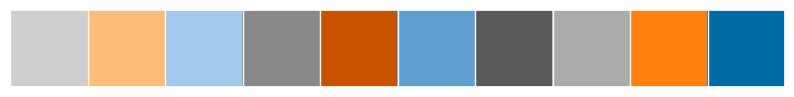

In [33]:
# using a color-blind friendly palette with 10 colors
color_blind_palette_10 = ['#cfcfcf', '#ffbc79', '#a2c8ec', '#898989', '#c85200',
                          '#5f9ed1', '#595959', '#ababab', '#ff800e', '#006ba4']

sns.palplot(color_blind_palette_10)

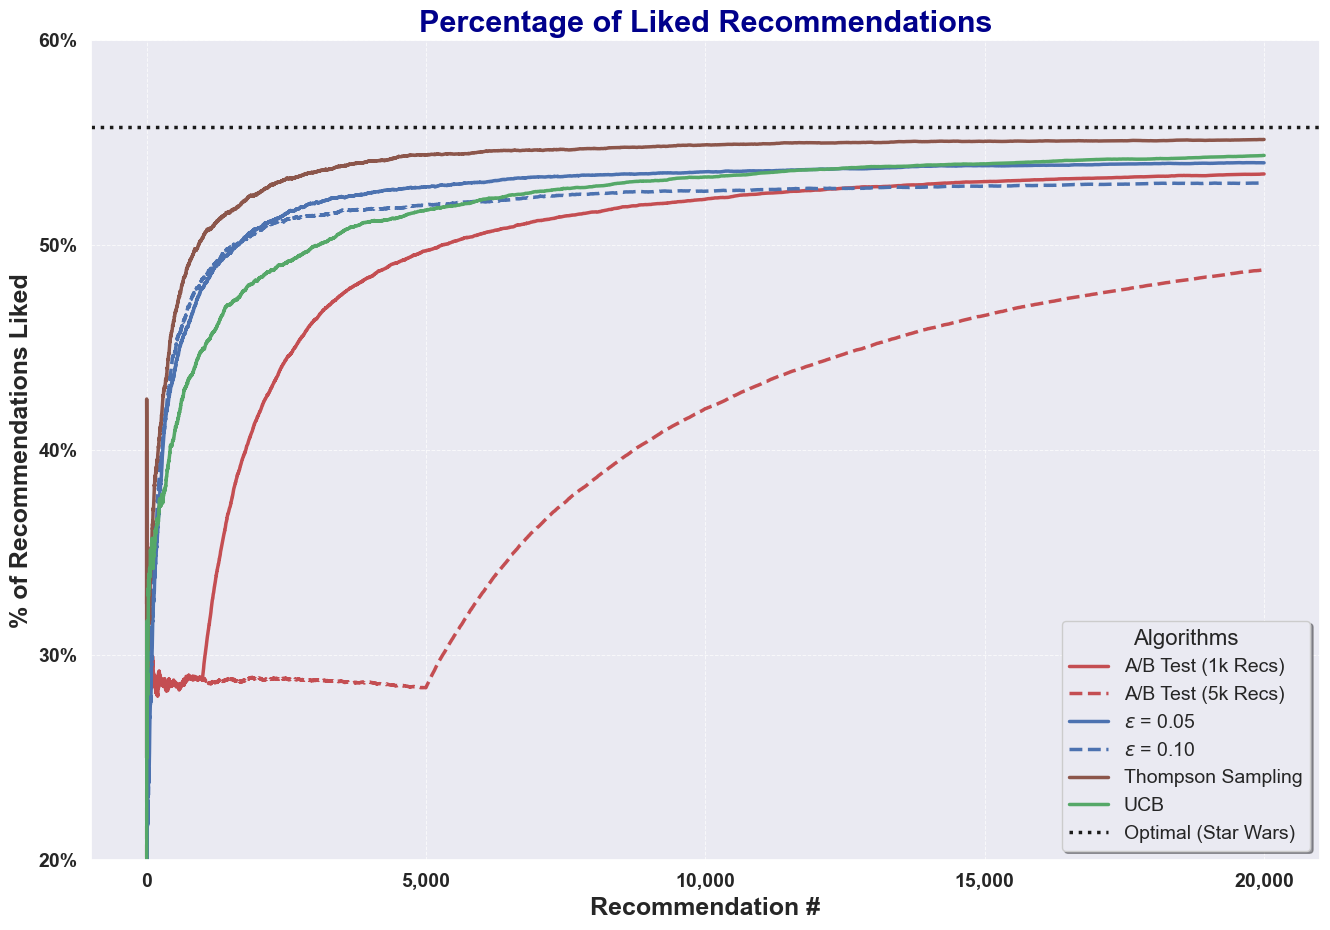

In [35]:
# Plot Results
fig, ax = plt.subplots(figsize=(14, 10))

# Define styles and labels for each algorithm
styles_and_labels = [
    (ab_1k_avg_results_df, 'r-', 'A/B Test (1k Recs)'),
    (ab_5k_avg_results_df, 'r--', 'A/B Test (5k Recs)'),
    (epsilon_05_avg_results_df, 'b-', '$\\epsilon$ = 0.05'),
    (epsilon_10_avg_results_df, 'b--', '$\\epsilon$ = 0.10'),
    (thompson_avg_results_df, 'tab:brown', 'Thompson Sampling'),
    (ucb_avg_results_df, 'g-', 'UCB')
]

# Plot each algorithm's results
for avg_results_df, style, label in styles_and_labels:
    ax.plot(avg_results_df["visit"], avg_results_df["fraction_relevant"], style, linewidth=2.5, label=label)

# Add a line for the optimal value
ax.axhline(y=0.5575, color='k', linestyle=':', linewidth=2.5, label='Optimal (Star Wars)')

# Enhancing aesthetics
ax.set_title('Percentage of Liked Recommendations', fontsize=22, fontweight='bold', color='darkblue')
ax.set_xlabel('Recommendation #', fontsize=18, fontweight='bold')
ax.set_ylabel('% of Recommendations Liked', fontsize=18, fontweight='bold')

# Customizing ticks
ax.set_xticks(range(0, 22000, 5000))
ax.set_xticklabels([f"{x:,}" for x in range(0, 22000, 5000)], fontsize=14, fontweight='bold')
ax.set_yticks(np.arange(0.2, 0.7, 0.1))
ax.set_yticklabels([f"{int(y*100)}%" for y in np.arange(0.2, 0.7, 0.1)], fontsize=14, fontweight='bold')
ax.set_ylim(0.2, 0.6)

# Adding gridlines for better readability
ax.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.7)

# Add legend with improved styling
ax.legend(fontsize=14, loc='lower right', frameon=True, shadow=True, title="Algorithms", title_fontsize=16)

# Show plot
plt.tight_layout()
plt.show()
